In [1]:
# Script to convert all MIDIs to .wav files. 
# Uncomment if you only have the MIDI files

# import os
# from midi2audio import FluidSynth

# for file in os.listdir("midis"):
#     fs = FluidSynth()
#     fs.midi_to_audio("./midis/"+file, "./wavs/"+file+".wav")


In [1]:
%matplotlib inline
import itertools
import numpy, scipy, matplotlib.pyplot as plt, pandas, librosa,sklearn
# import config

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

import librosa
import numpy
import pandas as pd
import os
import sklearn
import config1

In [2]:
# ---------------DO NOT execute this block if you alreadt downloaded data_set.csv----------------

def main():
    samp_rate = config1.CreateDataset.SAMPLING_RATE
    frame_size = config1.CreateDataset.FRAME_SIZE
    hop_size = config1.CreateDataset.HOP_SIZE
    dataset_dir = config1.CreateDataset.DATASET_DIRECTORY

    # sub_folders = get_subdirectories(dataset_dir)

    # labels = []
    is_created = False

    print("Extracting features from audios...")
    # for sub_folder in sub_folders:
        # print(".....Working in folder:", sub_folder)
        # sample_arrays = get_sample_arrays(dataset_dir, sub_folder, samp_rate)
        # for sample_array in sample_arrays:
            # row = extract_features(sample_array, samp_rate, frame_size, hop_size)
            # if not is_created:
                # dataset_numpy = numpy.array(row)
                # is_created = True
            # elif is_created:
                # dataset_numpy = numpy.vstack((dataset_numpy, row))

            # labels.append(sub_folder)
            
    sample_arrays, labels = get_sample_arrays(dataset_dir, samp_rate)
    for sample_array in sample_arrays:

        row = extract_features(sample_array, samp_rate, frame_size, hop_size)
        if not is_created:
            dataset_numpy = numpy.array(row)
            is_created = True
        elif is_created:
            dataset_numpy = numpy.vstack((dataset_numpy, row))
            
    print("Normalizing the data...")
    scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
    dataset_numpy = scaler.fit_transform(dataset_numpy)

    Feature_Names = ['meanZCR', 'stdZCR', 'meanSpecCentroid', 'stdSpecCentroid', 'meanSpecContrast', 'stdSpecContrast',
                     'meanSpecBandwidth', 'stdSpecBandwidth', 'meanSpecRollof', 'stdSpecRollof',
                     'meanMFCC_1', 'stdMFCC_1', 'meanMFCC_2', 'stdMFCC_2', 'meanMFCC_3', 'stdMFCC_3',
                     'meanMFCC_4', 'stdMFCC_4', 'meanMFCC_5', 'stdMFCC_5', 'meanMFCC_6', 'stdMFCC_6',
                     'meanMFCC_7', 'stdMFCC_7', 'meanMFCC_8', 'stdMFCC_8', 'meanMFCC_9', 'stdMFCC_9',
                     'meanMFCC_10', 'stdMFCC_10', 'meanMFCC_11', 'stdMFCC_11', 'meanMFCC_12', 'stdMFCC_12',
                     'meanMFCC_13', 'stdMFCC_13'
                     ]
    dataset_pandas = pandas.DataFrame(dataset_numpy, columns=Feature_Names)

    dataset_pandas["genre"] = labels
    dataset_pandas.to_csv("data_set.csv", index=False)
    print("Data set has been created and sent to the project folder!")

# def get_subdirectories(a_dir):
#     return [name for name in os.listdir(a_dir)
#             if os.path.isdir(os.path.join(a_dir, name))]


def get_sample_arrays(dataset_dir, samp_rate):
    # path_of_audios = librosa.util.find_files(dataset_dir + "/" + folder_name)
    path_of_audios = librosa.util.find_files(dataset_dir)
    
    audios = []
    labels = []
    
    ds = pd.read_csv("ds_labeled_with_midi.csv")
    
    for audio in path_of_audios:
        x, sr = librosa.load(audio, sr=samp_rate, duration=60.0)
        audios.append(x)
        # print(audio)
        audio_name = audio.split("\\")[5][:-8]
        label = ds.loc[ds['audio_name'] == audio_name]['era'].values[0]
        
        labels.append(label)
        
    audios_numpy = numpy.array(audios)
    return audios_numpy, labels


def extract_features(signal, sample_rate, frame_size, hop_size):
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=signal, frame_length=frame_size, hop_length=hop_size)
    spectral_centroid = librosa.feature.spectral_centroid(y=signal, sr=sample_rate, n_fft=frame_size,
                                                          hop_length=hop_size)
    spectral_contrast = librosa.feature.spectral_contrast(y=signal, sr=sample_rate, n_fft=frame_size,
                                                          hop_length=hop_size)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=signal, sr=sample_rate, n_fft=frame_size,
                                                            hop_length=hop_size)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=signal, sr=sample_rate, n_fft=frame_size, hop_length=hop_size)
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=frame_size, hop_length=hop_size)

    return [

        numpy.mean(zero_crossing_rate),
        numpy.std(zero_crossing_rate),
        numpy.mean(spectral_centroid),
        numpy.std(spectral_centroid),
        numpy.mean(spectral_contrast),
        numpy.std(spectral_contrast),
        numpy.mean(spectral_bandwidth),
        numpy.std(spectral_bandwidth),
        numpy.mean(spectral_rolloff),
        numpy.std(spectral_rolloff),

        numpy.mean(mfccs[1, :]),
        numpy.std(mfccs[1, :]),
        numpy.mean(mfccs[2, :]),
        numpy.std(mfccs[2, :]),
        numpy.mean(mfccs[3, :]),
        numpy.std(mfccs[3, :]),
        numpy.mean(mfccs[4, :]),
        numpy.std(mfccs[4, :]),
        numpy.mean(mfccs[5, :]),
        numpy.std(mfccs[5, :]),
        numpy.mean(mfccs[6, :]),
        numpy.std(mfccs[6, :]),
        numpy.mean(mfccs[7, :]),
        numpy.std(mfccs[7, :]),
        numpy.mean(mfccs[8, :]),
        numpy.std(mfccs[8, :]),
        numpy.mean(mfccs[9, :]),
        numpy.std(mfccs[9, :]),
        numpy.mean(mfccs[10, :]),
        numpy.std(mfccs[10, :]),
        numpy.mean(mfccs[11, :]),
        numpy.std(mfccs[11, :]),
        numpy.mean(mfccs[12, :]),
        numpy.std(mfccs[12, :]),
        numpy.mean(mfccs[13, :]),
        numpy.std(mfccs[13, :]),
    ]


if __name__ == '__main__':
    main()


Extracting features from audios...


<ipython-input-2-d403adfdee4d>:77: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  audios_numpy = numpy.array(audios)


Normalizing the data...
Data set has been created and sent to the project folder!


In [3]:
data_set=pandas.read_csv('data_set.csv',index_col=False)
GENRES=['Baroque', 'Classical', 'Romantic']

number_of_rows,number_of_cols = data_set.shape
data_set[:5].style

,meanZCR,stdZCR,meanSpecCentroid,stdSpecCentroid,meanSpecContrast,stdSpecContrast,meanSpecBandwidth,stdSpecBandwidth,meanSpecRollof,stdSpecRollof,meanMFCC_1,stdMFCC_1,meanMFCC_2,stdMFCC_2,meanMFCC_3,stdMFCC_3,meanMFCC_4,stdMFCC_4,meanMFCC_5,stdMFCC_5,meanMFCC_6,stdMFCC_6,meanMFCC_7,stdMFCC_7,meanMFCC_8,stdMFCC_8,meanMFCC_9,stdMFCC_9,meanMFCC_10,stdMFCC_10,meanMFCC_11,stdMFCC_11,meanMFCC_12,stdMFCC_12,meanMFCC_13,stdMFCC_13,genre
0,-0.113313,-0.134941,-0.258182,-0.592350,0.284238,0.066672,-0.505680,-0.498907,-0.406889,-0.679286,0.137226,0.596316,-0.302302,-0.570208,-0.296130,-0.319273,0.197806,-0.052264,-0.114964,-0.108302,-0.323541,-0.007060,0.207844,-0.053283,0.344115,-0.338955,-0.164356,-0.117396,-0.314525,-0.058731,-0.491146,-0.193769,-0.084394,-0.275126,-0.157086,-0.358796,Baroque
1,0.127876,-0.482580,0.031359,-0.771330,0.829289,-0.545717,-0.158359,-0.651156,-0.212691,-0.767674,0.326162,-0.413226,0.091926,-0.167155,-0.072928,-0.549720,-0.010286,-0.200469,0.101535,-0.195953,0.027206,-0.237354,0.229748,-0.208067,0.112881,-0.392611,-0.303564,-0.440101,-0.497962,-0.285538,-0.660428,-0.107242,-0.179908,-0.094412,-0.078815,-0.150532,Baroque
2,0.236238,-0.495973,-0.005075,-0.756393,0.195958,-0.453394,-0.369129,-0.679135,-0.214716,-0.783425,0.685214,-0.034563,-0.394123,-0.606860,-0.758532,-0.179862,0.310491,-0.137280,-0.183652,-0.021195,-0.437815,-0.140863,0.223844,-0.201530,0.156115,-0.411491,-0.381422,-0.200635,-0.420552,-0.150470,-0.441153,-0.090630,-0.073831,-0.264489,-0.264661,-0.402436,Baroque
3,0.401869,-0.594791,0.109457,-0.795122,0.662128,-0.482823,-0.284126,-0.705001,-0.158120,-0.802286,0.457122,-0.317609,-0.259690,-0.734689,-0.763231,-0.502218,0.031455,0.069118,-0.106020,-0.189005,-0.461283,-0.356938,-0.139418,0.056443,0.122186,0.011607,-0.165243,0.094602,-0.193370,0.194845,-0.362058,0.035883,-0.272567,-0.173582,-0.605591,0.048861,Baroque
4,0.255693,-0.608686,0.038769,-0.784012,0.527493,-0.517763,-0.388425,-0.743898,-0.150697,-0.793318,0.696792,-0.189766,-0.506146,-0.863507,-0.718469,-0.336092,0.486899,-0.336313,-0.232007,-0.042804,-0.627672,-0.248894,-0.076631,-0.039376,-0.045006,-0.246668,-0.511470,-0.392924,-0.520163,-0.297977,-0.574080,-0.275016,-0.561297,-0.321764,-0.671866,-0.284435,Baroque


In [4]:
from sklearn.model_selection import train_test_split

data_set_values=numpy.array(data_set)

train, test = train_test_split(data_set_values, test_size = 0.2,random_state=2,
                              stratify=data_set_values[:,number_of_cols-1])

train_x=train[:,:number_of_cols-1]
train_y=train[:,number_of_cols-1]

test_x=test[:,:number_of_cols-1]
test_y=test[:,number_of_cols-1]

print("Training data size: {}".format(train.shape))
print("Test data size: {}".format(test.shape))

Training data size: (581, 37)
Test data size: (146, 37)


In [5]:
def confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_cnf(model,dataset_x,dataset_y,GENRES):
    true_y=dataset_y
    true_x=dataset_x
    pred=model.predict(true_x)

    print("---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------\n")

    print("Real Test dataset labels: \n{}\n".format(true_y))
    print("Predicted Test dataset labels: \n{}".format(pred))

    cnf_matrix=sklearn.metrics.confusion_matrix(true_y,pred)
    plt.figure()
    a=confusion_matrix(cnf_matrix,classes=GENRES,title='Confusion matrix')

Max Accuracy is 0.760 on test dataset with 10 neighbors.

Training Score: 0.764
Test score: 0.760
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['Baroque' 'Romantic' 'Romantic' 'Romantic' 'Romantic' 'Romantic'
 'Romantic' 'Romantic' 'Romantic' 'Romantic' 'Romantic' 'Baroque'
 'Romantic' 'Romantic' 'Classical' 'Baroque' 'Romantic' 'Baroque'
 'Baroque' 'Baroque' 'Baroque' 'Romantic' 'Classical' 'Classical'
 'Classical' 'Romantic' 'Romantic' 'Baroque' 'Romantic' 'Classical'
 'Baroque' 'Baroque' 'Classical' 'Baroque' 'Romantic' 'Romantic'
 'Classical' 'Romantic' 'Romantic' 'Romantic' 'Romantic' 'Baroque'
 'Romantic' 'Romantic' 'Romantic' 'Romantic' 'Classical' 'Romantic'
 'Romantic' 'Baroque' 'Romantic' 'Classical' 'Baroque' 'Baroque'
 'Classical' 'Baroque' 'Romantic' 'Baroque' 'Romantic' 'Romantic'
 'Romantic' 'Romantic' 'Romantic' 'Baroque' 'Romantic' 'Romantic'
 'Classical' 'Baroque' 'Romantic' 'Classical' 'Romantic' 'Classical'
 'Romantic

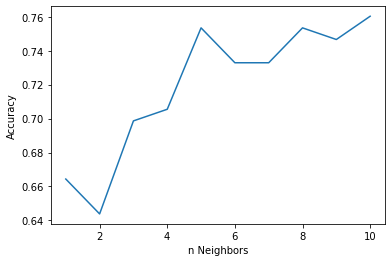

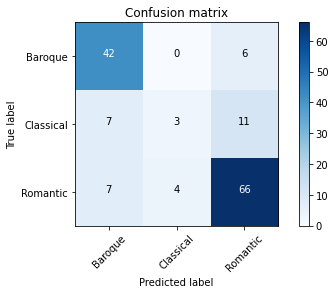

In [6]:
results_knn=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    results_knn.append(knn.score(test_x,test_y))
    
max_accuracy_knn=max(results_knn)
best_k=1+results_knn.index(max(results_knn))
print("Max Accuracy is {:.3f} on test dataset with {} neighbors.\n".format(max_accuracy_knn,best_k))

plt.plot(numpy.arange(1,11),results_knn)
plt.xlabel("n Neighbors")
plt.ylabel("Accuracy")


knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_x,train_y)
print("Training Score: {:.3f}".format(knn.score(train_x,train_y)))
print("Test score: {:.3f}".format(knn.score(test_x,test_y)))  

plot_cnf(knn,test_x,test_y,GENRES)

Max Accuracy is 0.740 on test dataset with 14 estimators.

Training Score: 0.995
Test score: 0.740
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['Baroque' 'Romantic' 'Romantic' 'Romantic' 'Romantic' 'Romantic'
 'Romantic' 'Romantic' 'Romantic' 'Romantic' 'Romantic' 'Baroque'
 'Romantic' 'Romantic' 'Classical' 'Baroque' 'Romantic' 'Baroque'
 'Baroque' 'Baroque' 'Baroque' 'Romantic' 'Classical' 'Classical'
 'Classical' 'Romantic' 'Romantic' 'Baroque' 'Romantic' 'Classical'
 'Baroque' 'Baroque' 'Classical' 'Baroque' 'Romantic' 'Romantic'
 'Classical' 'Romantic' 'Romantic' 'Romantic' 'Romantic' 'Baroque'
 'Romantic' 'Romantic' 'Romantic' 'Romantic' 'Classical' 'Romantic'
 'Romantic' 'Baroque' 'Romantic' 'Classical' 'Baroque' 'Baroque'
 'Classical' 'Baroque' 'Romantic' 'Baroque' 'Romantic' 'Romantic'
 'Romantic' 'Romantic' 'Romantic' 'Baroque' 'Romantic' 'Romantic'
 'Classical' 'Baroque' 'Romantic' 'Classical' 'Romantic' 'Classical'
 'Romanti

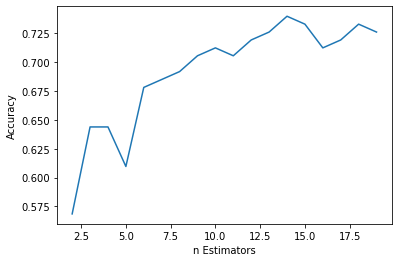

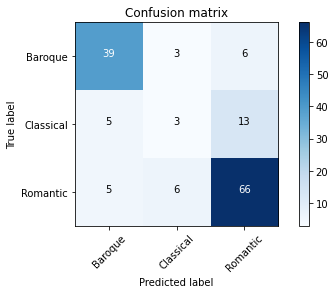

In [7]:
results_forest=[]
for i in range(2,20):
    forest=RandomForestClassifier(random_state=42,n_estimators=i)
    forest.fit(train_x,train_y)
    results_forest.append(forest.score(test_x,test_y))
    
max_accuracy_forest=max(results_forest)
best_n_est=2+results_forest.index(max(results_forest))
print("Max Accuracy is {:.3f} on test dataset with {} estimators.\n".format(max_accuracy_forest,best_n_est))

plt.plot(numpy.arange(2,20),results_forest)
plt.xlabel("n Estimators")
plt.ylabel("Accuracy")


forest=RandomForestClassifier(random_state=42,n_estimators=best_n_est)
forest.fit(train_x,train_y)
print("Training Score: {:.3f}".format(forest.score(train_x,train_y)))
print("Test score: {:.3f}".format(forest.score(test_x,test_y)))

plot_cnf(forest,test_x,test_y,GENRES)

Training Score: 0.936
Test score: 0.788
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['Baroque' 'Romantic' 'Romantic' 'Romantic' 'Romantic' 'Romantic'
 'Romantic' 'Romantic' 'Romantic' 'Romantic' 'Romantic' 'Baroque'
 'Romantic' 'Romantic' 'Classical' 'Baroque' 'Romantic' 'Baroque'
 'Baroque' 'Baroque' 'Baroque' 'Romantic' 'Classical' 'Classical'
 'Classical' 'Romantic' 'Romantic' 'Baroque' 'Romantic' 'Classical'
 'Baroque' 'Baroque' 'Classical' 'Baroque' 'Romantic' 'Romantic'
 'Classical' 'Romantic' 'Romantic' 'Romantic' 'Romantic' 'Baroque'
 'Romantic' 'Romantic' 'Romantic' 'Romantic' 'Classical' 'Romantic'
 'Romantic' 'Baroque' 'Romantic' 'Classical' 'Baroque' 'Baroque'
 'Classical' 'Baroque' 'Romantic' 'Baroque' 'Romantic' 'Romantic'
 'Romantic' 'Romantic' 'Romantic' 'Baroque' 'Romantic' 'Romantic'
 'Classical' 'Baroque' 'Romantic' 'Classical' 'Romantic' 'Classical'
 'Romantic' 'Romantic' 'Romantic' 'Romantic' 'Baroque' 'Romantic'
 '

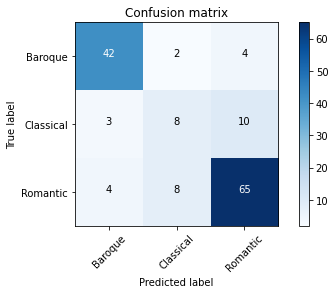

In [8]:
svm=SVC(C=100,gamma=0.08)
svm.fit(train_x,train_y)
print("Training Score: {:.3f}".format(svm.score(train_x,train_y)))
print("Test score: {:.3f}".format(svm.score(test_x,test_y)))

plot_cnf(svm,test_x,test_y,GENRES)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Score: 0.974
Test score: 0.753
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['Baroque' 'Romantic' 'Romantic' 'Romantic' 'Romantic' 'Romantic'
 'Romantic' 'Romantic' 'Romantic' 'Romantic' 'Romantic' 'Baroque'
 'Romantic' 'Romantic' 'Classical' 'Baroque' 'Romantic' 'Baroque'
 'Baroque' 'Baroque' 'Baroque' 'Romantic' 'Classical' 'Classical'
 'Classical' 'Romantic' 'Romantic' 'Baroque' 'Romantic' 'Classical'
 'Baroque' 'Baroque' 'Classical' 'Baroque' 'Romantic' 'Romantic'
 'Classical' 'Romantic' 'Romantic' 'Romantic' 'Romantic' 'Baroque'
 'Romantic' 'Romantic' 'Romantic' 'Romantic' 'Classical' 'Romantic'
 'Romantic' 'Baroque' 'Romantic' 'Classical' 'Baroque' 'Baroque'
 'Classical' 'Baroque' 'Romantic' 'Baroque' 'Romantic' 'Romantic'
 'Romantic' 'Romantic' 'Romantic' 'Baroque' 'Romantic' 'Romantic'
 'Classical' 'Baroque' 'Romantic' 'Classical' 'Romantic' 'Classical'
 'Romantic' 'Romantic' 'Romantic' 'Romantic' 'Baroque' 'Romantic'
 '

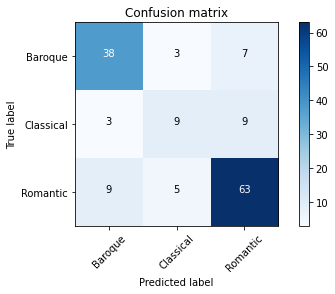

In [9]:
neural=MLPClassifier(max_iter=400,random_state=2,hidden_layer_sizes=[40,40])
neural.fit(train_x,train_y)
print("Training Score: {:.3f}".format(neural.score(train_x,train_y)))
print("Test score: {:.3f}".format(neural.score(test_x,test_y)))

plot_cnf(neural,test_x,test_y,GENRES)